**1. Data Exploration and Preprocessing**

In [7]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Download the necessary NLTK packages
# This code checks if the resource exists, and if not, it downloads it.
try:
    # Check if the 'stopwords' corpus is already downloaded
    stopwords.words('english')
except LookupError:
    # If not, download it
    print("NLTK 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
    print("Download complete.")

# Load the dataset
df = pd.read_csv('blogs.csv')

In [8]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Information:\n", df.info())
print("\nFirst 5 rows of the dataset:\n", df.head())
print("\nNumber of unique categories:\n", df['Labels'].nunique())
print("\nDistribution of categories:\n", df['Labels'].value_counts())

Dataset Shape: (2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

Column Information:
 None

First 5 rows of the dataset:
                                                 Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Number of unique categories:
 20

Distribution of categories:
 alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.re

In [9]:
# The `Labels` column has a mix of strings. Let's clean it up.
df['Labels'] = df['Labels'].apply(lambda x: x.strip())

In [10]:
# Initialize NLTK stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans and preprocesses the text data.
    - Converts text to lowercase.
    - Removes punctuation and special characters.
    - Removes stopwords.
    - Removes extra spaces.
    """
    # Check if the input is a string, if not, convert it to a string.
    if not isinstance(text, str):
        text = str(text)

    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


In [11]:
# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)


In [12]:
# Perform feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_data'])
y = df['Labels']

print("\nShape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (2000, 5000)


**2. Naive Bayes Model for Text Classification**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)


MultinomialNB()

In [17]:
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Model Accuracy: 0.8375

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med   

In [18]:
import nltk
nltk.download('punkt')
nltk.download('brown')

[nltk_data] Downloading package punkt to /Users/sakshsmac/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /Users/sakshsmac/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [20]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.1 MB/s eta 0:00:00-:--:--
Note: you may need to restart the kernel to use updated packages.


**3. Sentiment Analysis**

In [21]:
from textblob import TextBlob
from collections import Counter

# Function to get sentiment label from TextBlob polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'



In [22]:
# Apply sentiment analysis to the cleaned text data
df['sentiment'] = df['cleaned_data'].apply(get_sentiment)


In [23]:
# Examine the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
print("\nDistribution of Sentiments:")
print(sentiment_counts)



Distribution of Sentiments:
Positive    1453
Negative     544
Neutral        3
Name: sentiment, dtype: int64


In [24]:
# Examine the distribution of sentiments across different categories
sentiment_by_category = df.groupby('Labels')['sentiment'].value_counts().unstack(fill_value=0)
print("\nSentiment Distribution by Category:")
print(sentiment_by_category)


Sentiment Distribution by Category:
sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     35        0        65
comp.graphics                   27        0        73
comp.os.ms-windows.misc         23        0        77
comp.sys.ibm.pc.hardware        19        0        81
comp.sys.mac.hardware           26        0        74
comp.windows.x                  20        2        78
misc.forsale                    21        0        79
rec.autos                       24        0        76
rec.motorcycles                 28        0        72
rec.sport.baseball              35        0        65
rec.sport.hockey                40        0        60
sci.crypt                       19        0        81
sci.electronics                 25        0        75
sci.med                         34        0        66
sci.space                       28        0        72
soc.religion.christian          25        0  

**4. Evaluation**

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# X_test, y_test, and y_pred are required for this section.

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8375


In [26]:
# 2. Generate a comprehensive classification report
# This includes precision, recall, and F1-score for each category.
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88     

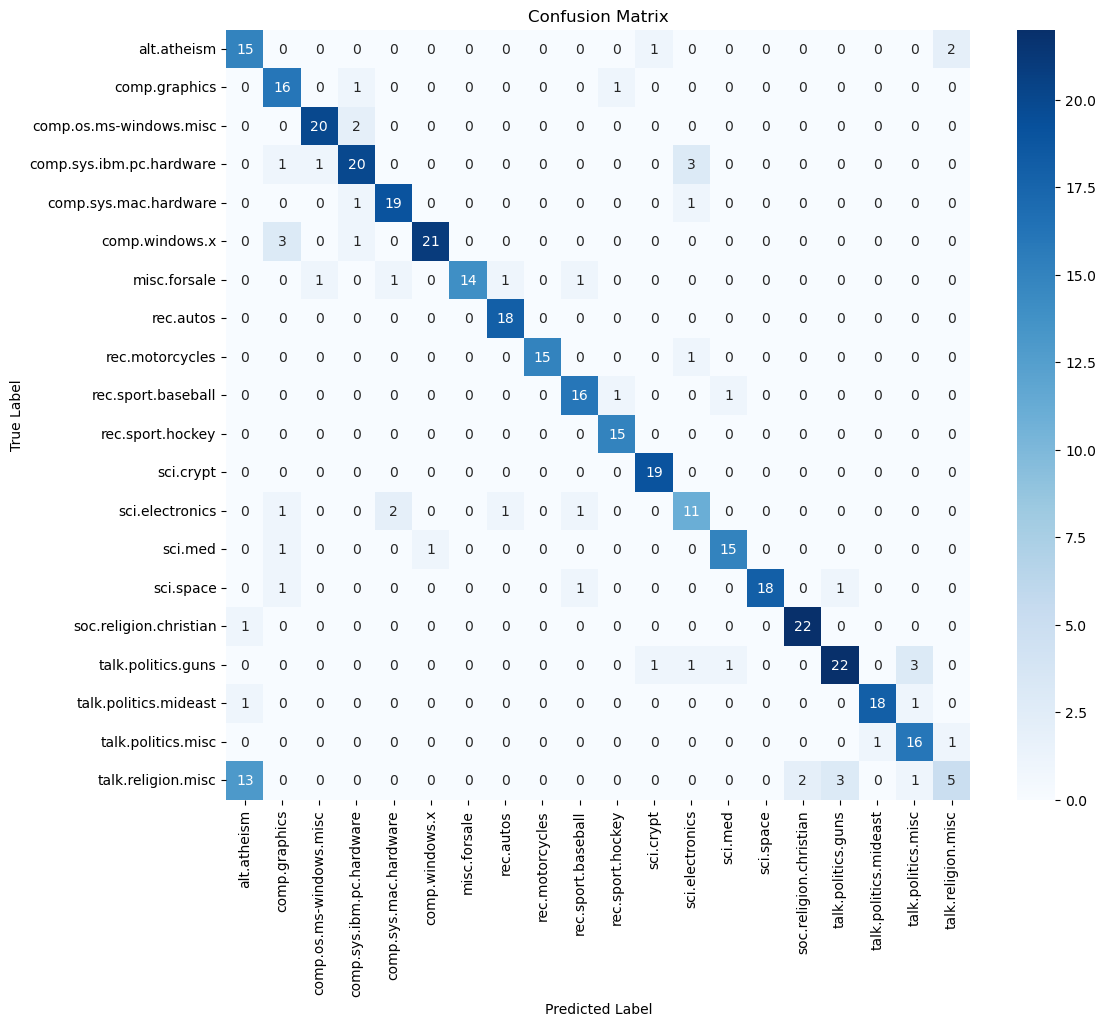


Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0 16  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 20  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  3  0  1  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0 14  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  1  0  1  0  0 11  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0 18  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 

In [27]:
# 3. Visualize the Confusion Matrix
# A confusion matrix provides a visual breakdown of correct and incorrect predictions.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:\n", cm)

***Classification Report***


This report provides a statistical breakdown of how well this model performed for each category.

**Precision:** This tells that, for all the blog posts the model predicted to be in a certain category, how many were actually correct. A high precision means the model is reliable when it makes a positive prediction for a specific class.

**Recall:** This tells that, for all the blog posts that actually belong to a certain category, how many the model correctly identified. A high recall means the model is good at finding all the relevant examples of a class.

**F1-score:** This is a single score that provides a balance between precision and recall. It is especially useful when the categories are unbalanced.

**Support:** This shows the total number of blog posts in that category within this test data.

**Accuracy:** This is the overall percentage of correct predictions of this model made across all categories.



**Confusion Matrix**


This is a grid of numbers that provides a more granular view of this model's predictions.

The rows represent the true labels (the actual categories of the blog posts).

The columns represent the predicted labels (the categories of this model assigned to them).

Each number shows how many blog posts from a specific true category were classified into a specific predicted category.